In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
test_data2=pd.read_csv('test.csv')

In [3]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
full_data=[train_data,test_data]
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1 Survived

In [5]:
train_data.Survived.value_counts().plot

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Survived)

2 Pclass

In [ ]:
train_data.Pclass.value_counts()

In [ ]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True)

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.Pclass,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Pclass,y=train_data.Survived)

3 Name

In [6]:
def abstract(strs):
    nu=strs.split(',')[1].split('.')[0].strip()
    return nu

In [7]:
for data in full_data:
    data['Title']=data['Name'].apply(abstract)
    
    

train_data.Title.value_counts()

In [8]:
for data in full_data:
    data['Title']=data['Title'].replace(['Dr','Rev','Col','Major','the Countess','Jonkheer','Don','Capt'],'Rare')
    data['Title']=data['Title'].replace(['Mlle','Ms','Mme','Lady','Sir'],['Miss','Mrs','Miss','Mrs','Mr'])

In [9]:
train_data.Title.value_counts()

Mr        518
Miss      185
Mrs       127
Master     40
Rare       21
Name: Title, dtype: int64

sex

train_data.Sex.value_counts()

pd.crosstab(train_data.Sex,train_data.Survived,margins=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.Sex,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Sex,y=train_data.Survived)

In [11]:
lab=LabelEncoder()

In [ ]:
mapsex={'male':1,'female':0}
for data in full_data:
    data['Sex']=data['Sex'].map(mapsex)

In [12]:
for data in full_data:
    data['Sex']=lab.fit_transform(data['Sex'])

In [13]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


Age

train_data.Age.describe()

train_data.Age.value_counts().hist()

train_data[(train_data.Age<5)&(train_data.Survived==1)].Age.hist()

train_data[(train_data.Age<5)&(train_data.Survived==0)].Age.hist()

In [24]:
print ('Mr age:',train_data[train_data.Title=='Mr'].Age.mean())
print ('Master age:',train_data[train_data.Title=='Master'].Age.mean())
print ('Miss age:',train_data[train_data.Title=='Miss'].Age.mean())
print ('Mrs age:',train_data[train_data.Title=='Mrs'].Age.mean())
print ('Rare age:',train_data[train_data.Title=='Rare'].Age.mean())

Mr age: 32.409774436090224
Master age: 4.574166666666667
Miss age: 21.818791946308725
Mrs age: 35.93636363636364
Rare age: 45.25


In [14]:
for data in full_data:
    data.loc[data.Age.isnull()&(data.Title=='Mr'),'Age']=32
    data.loc[data.Age.isnull()&(data.Title=='Mrs'),'Age']=36
    data.loc[data.Age.isnull()&(data.Title=='Master'),'Age']=5
    data.loc[data.Age.isnull()&(data.Title=='Miss'),'Age']=22
    data.loc[data.Age.isnull()&(data.Title=='Rare'),'Age']=45


In [15]:
for data in full_data:
    data['Age_cut']=pd.cut(data['Age'],5)
    

In [16]:
train_data.Age_cut.value_counts()

(16.336, 32.252]    501
(32.252, 48.168]    206
(0.34, 16.336]      104
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_cut, dtype: int64

In [17]:
for data in full_data:
    data.loc[(data['Age']>0)&(data['Age']<=16),'Age_new']=1
    data.loc[(data['Age']>16)&(data['Age']<=32),'Age_new']=2
    data.loc[(data['Age']>32)&(data['Age']<=48),'Age_new']=3
    data.loc[(data['Age']>48)&(data['Age']<=64),'Age_new']=4
    data.loc[(data['Age']>64)&(data['Age']<=80),'Age_new']=5

In [18]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cut,Age_new
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,"(16.336, 32.252]",2.0


SibSp Parch

train_data.SibSp.value_counts()

train_data.Parch.value_counts()

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.SibSp,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.SibSp,y=train_data.Survived)

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.Parch,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Parch,y=train_data.Survived)

In [19]:
for data in full_data:
    data['Familysize']=data['Parch']+data['SibSp']+1
    data['IsAlone']=0
    data.loc[data['Familysize']==1,'IsAlone']=1

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.Familysize,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Familysize,y=train_data.Survived)

plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.IsAlone,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.IsAlone,y=train_data.Survived)

train_data.head(1)

Fare

plt.hist(x = [train_data[train_data.Survived==1].Fare, train_data[train_data.Survived==0].Fare], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.legend()

Cabin

In [21]:
test_data[test_data.Fare.isnull()]
test_data[(test_data.Pclass==3)&(test_data.Embarked==1)].Fare.mean()
test_data.loc[test_data.Fare.isnull(),'Fare']=13.9

test_data.isnull().sum()

In [22]:
for data in full_data:
    data['Has_Cabin']=0
    data.loc[data.Cabin!=None,'Has_Cabin']=1

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=train_data.Has_Cabin,hue=train_data.Survived)
plt.subplot(122)
sns.barplot(train_data.Has_Cabin,y=train_data.Survived)

Embarked

In [ ]:
train_data.Embarked.value_counts()

In [ ]:
train_data[train_data.Embarked=='S'].Fare.median()

In [ ]:
train_data[(train_data.Fare<80)&(train_data.Fare>78)&train_data.Has_Cabin==1].Embarked.value_counts()

In [ ]:
train_data[train_data.Embarked=='C'].Fare.median()

In [ ]:
train_data[train_data.Embarked=='Q'].Fare.median()

In [ ]:
train_data[train_data.Embarked.isnull()]

In [23]:
train_data.Embarked=train_data.Embarked.fillna('C')

In [ ]:
train_data.Embarked.isnull().sum()

In [49]:
Embarkedmap={'S':1,'C':2,'Q':3}
for data in full_data:
    data.Embarked=data.Embarked.map(Embarkedmap)

In [25]:
for data in full_data:
    data.Embarked=lab.fit_transform(data.Embarked)

In [ ]:
train_data.head(2)

In [27]:
droplist=['PassengerId','Name','Age','Ticket','Cabin','Title','Age_cut']
train_data=train_data.drop(droplist,axis=1)
test_data=test_data.drop(droplist,axis=1)
Y=train_data.Survived
train_data=train_data.drop(['Survived'],axis=1)

In [ ]:
train_data.head(1)

In [29]:
dummpylist=['Pclass','Sex','SibSp','Parch','Embarked','Familysize','IsAlone','Has_Cabin']

In [34]:
for data in full_data:
    data[dummpylist]=pd.get_dummies(data[dummpylist]).reset_index(drop=True)

In [38]:
train_data[dummpylist]=pd.get_dummies(train_data[dummpylist]).reset_index(drop=True)

In [ ]:
ALL_data=pd.concat([train_data,test_data])
ALL_data=pd.get_dummies(ALL_data,columns=dummpylist)

In [77]:
ALL_data.head()

,Fare,Age_new,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,...,Familysize_3,Familysize_4,Familysize_5,Familysize_6,Familysize_7,Familysize_8,Familysize_11,IsAlone_0,IsAlone_1,Has_Cabin_1
0,-0.503281,2.0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0.734750,3.0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.490231,2.0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.383191,3.0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,-0.487814,3.0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
ALL_data.Fare=sta.fit_transform(ALL_data.Fare.reshape(-1,1))

In [67]:
train_data=ALL_data[:891]
test_data=ALL_data[891:]

In [ ]:
sns.heatmap(train_data.corr(),cmap='Set3_r')

In [84]:
train_data.shape

(891, 37)

In [70]:
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
def cross_val(model, label):

    start_time = datetime.now()
    kf = StratifiedKFold(shuffle=True, random_state=1)
    oof = np.full(len(train), np.nan)
    auc_list = []
    for fold, (idx_tr, idx_va) in enumerate(kf.split(train, train.defects)):
        X_tr = train.iloc[idx_tr]
        X_va = train.iloc[idx_va]
        y_tr = X_tr.pop('defects')
        y_va = X_va.pop('defects')
        model.fit(X_tr, y_tr)
#         print(np.round(model[-1].coef_, 2), np.round(model[-1].intercept_, 2))
        try:
            y_va_pred = model.predict_proba(X_va)[:, 1]
        except AttributeError: # 'LinearSVC' object has no attribute 'predict_proba'
            y_va_pred = model.decision_function(X_va)
        oof[idx_va] = y_va_pred
        auc = roc_auc_score(y_va, y_va_pred)
        auc_list.append(auc)
    auc = np.array(auc_list).mean()
    execution_time = datetime.now() - start_time
    print(f"# AUC {auc:.5f}   time={str(execution_time)[-15:-7]}   {label}")
    result_list.append((auc, label, execution_time))
#     plt.figure(figsize=(6, 2))
#     plt.hist(oof, bins=200, density=True)
#     plt.show()
    return auc

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures

# ExtraTreesClassifier
score_list = []
for min_samples_leaf in [10, 20, 50, 100, 150]:
    auc = cross_val(make_pipeline(FunctionTransformer(np.log1p),
                                  ExtraTreesClassifier(n_estimators=100,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=1.0,
                                         random_state=1)),
                    f"ET {min_samples_leaf=}")
    score_list.append((min_samples_leaf, auc))
plot_score_list('ExtraTreesClassifier', 'min_samples_leaf')

In [85]:
model=[#linearmodel
    LogisticRegression(),
    #naive
    #MultinomialNB(),
    #GaussianNB(),
    #Discriminant
    LinearDiscriminantAnalysis(),
    #neibor
    KNeighborsClassifier(),
    #SVM
    SVC(),
    #tree
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()    
]

In [ ]:
columslist=['Name','score']
cv=KFold(n_splits=5,shuffle=True)
comparedata=pd.DataFrame(columns=columslist)
row=0
for alg in model:
    name=alg.__class__.__name__
    comparedata.loc[row,'Name']=name
    score=cross_val_score(alg,train_data,Y,cv=cv,scoring='accuracy')
    comparedata.loc[row,'score']=score.mean()
    
    row+=1
    
comparedata=comparedata.sort_values(by='score')
sns.barplot(x=comparedata.score,y=comparedata.Name,color='m')

In [109]:
comparedata.sort_values(by='score')

,Name,score
3,SVC,0.789034
4,DecisionTreeClassifier,0.790139
1,LinearDiscriminantAnalysis,0.801318
7,XGBClassifier,0.802461
2,KNeighborsClassifier,0.803547
0,LogisticRegression,0.804733
6,GradientBoostingClassifier,0.809196
5,RandomForestClassifier,0.809234


In [88]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [89]:
from sklearn.model_selection import GridSearchCV
X=train_data


In [90]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [110]:
knnpara={'n_neighbors':[3,6,7,10,20],'p':[1,2]}
knnmodel=GridSearchCV(knn,param_grid=knnpara,cv=cv)
knnmodel.fit(X,Y)
knn=knnmodel.best_estimator_
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [112]:
cross_val_score(knn,X,Y,cv=cv).mean()

0.8080911430544221

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

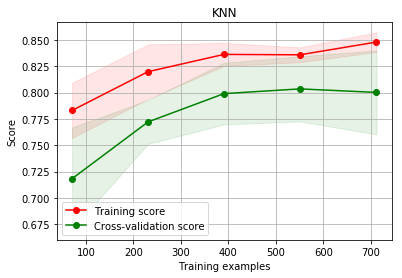

In [113]:
plot_learning_curve(knn,'KNN',X,Y,cv=cv)

In [114]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()

In [115]:
svm=SVC()
svm


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
svmpara={'C':[0.01,0.1,1,2,3,10,50,100]}
svmmodel=GridSearchCV(svm,param_grid=svmpara,cv=cv,scoring='accuracy')
svmmodel.fit(X,Y)
svm=svmmodel.best_estimator_
svm

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

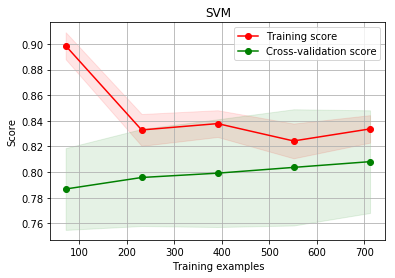

In [117]:
plot_learning_curve(svm,'SVM',X,Y,cv=cv)

In [118]:
cross_val_score(svm,X,Y,cv=cv).mean()

0.8125729709371665

In [119]:
from sklearn.pipeline import make_pipeline
normsvm=make_pipeline(norm,svm)

In [120]:
cross_val_score(normsvm,X,Y,cv=cv,scoring='accuracy').mean()

0.814864101437449

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

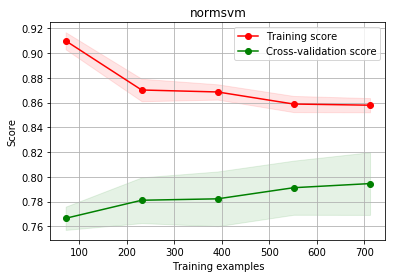

In [121]:
plot_learning_curve(normsvm,'normsvm',X,Y,cv=cv)

In [122]:
from sklearn.svm import LinearSVC
linearsvm=LinearSVC()
linearsvm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [123]:
lipara={'C':[0.1,1,10,100],'max_iter':[3000,4000]}
modellinear=GridSearchCV(linearsvm,param_grid=lipara,cv=cv,scoring='accuracy')
modellinear.fit(X,Y)
linearsvm=modellinear.best_estimator_


In [128]:
linearsvm

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=3000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

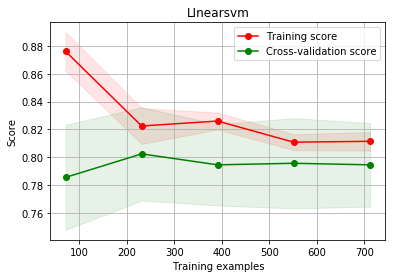

In [124]:
plot_learning_curve(modellinear.best_estimator_,'LInearsvm',X,Y,cv=cv)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

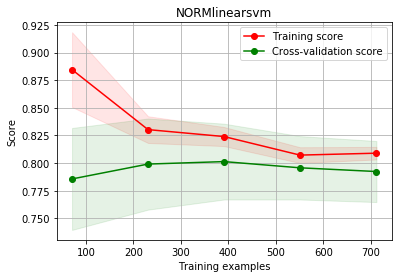

In [125]:
normlinearsvm=make_pipeline(norm,linearsvm)
plot_learning_curve(normlinearsvm,'NORMlinearsvm',X,Y,cv=cv)

In [126]:
cross_val_score(linearsvm,X,Y,cv=cv).mean()

0.8014374489988073

In [127]:
cross_val_score(normlinearsvm,X,Y,cv=cv).mean()

0.7923356976963152

In [131]:
log=LogisticRegression(C=1,max_iter=100)
log

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
logparameter={'penalty':['l1','l2'],'C':[0.09,0.08,0.1]}
logmodel=GridSearchCV(log,param_grid=logparameter,cv=cv,scoring='accuracy')
logmodel.fit(X,Y)
logmodel.best_estimator_
log=logmodel.best_estimator_
log

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

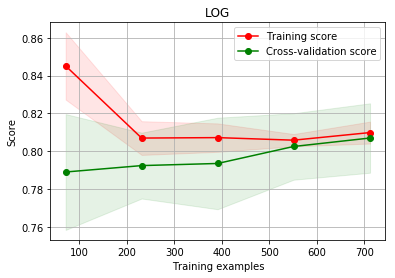

In [137]:
plot_learning_curve(log,'LOG',X,Y,cv=cv)

In [138]:
cross_val_score(log,X,Y,cv=cv).mean()

0.8013684012303056

In [139]:
comparedata

,Name,score
3,SVC,0.789034
4,DecisionTreeClassifier,0.790139
1,LinearDiscriminantAnalysis,0.801318
7,XGBClassifier,0.802461
2,KNeighborsClassifier,0.803547
0,LogisticRegression,0.804733
6,GradientBoostingClassifier,0.809196
5,RandomForestClassifier,0.809234


In [140]:
dec=DecisionTreeClassifier()
dec

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
decparameter={'max_depth':[8,9,10],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4,5]}
decmodel=GridSearchCV(dec,param_grid=decparameter,cv=cv,scoring='accuracy')
decmodel.fit(X,Y)
dec=decmodel.best_estimator_
dec

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

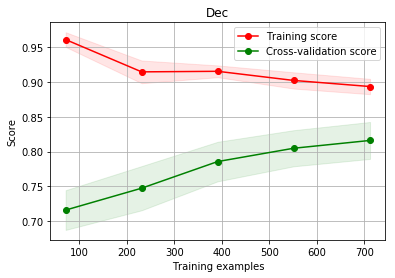

In [144]:
plot_learning_curve(dec,'Dec',X,Y,cv=cv)

In [147]:
cross_val_score(dec,X,Y,cv=cv).mean()

0.8069926558282592

In [148]:
lda=LinearDiscriminantAnalysis()
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [149]:
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [150]:
ldaparameter={'n_components':[6,7,8,9]}
ldamodel=GridSearchCV(lda,param_grid=ldaparameter,cv=cv,scoring='accuracy')
ldamodel.fit(X,Y)
ldamodel.best_estimator_
lda=ldamodel.best_estimator_
lda

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables ar

LinearDiscriminantAnalysis(n_components=6, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables ar

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

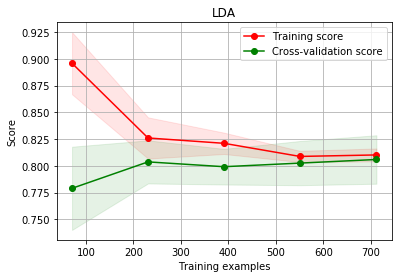

In [151]:
plot_learning_curve(lda,'LDA',X,Y,cv=cv)

In [152]:
cross_val_score(lda,X,Y,cv=cv).mean()

c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables ar

0.7968426338585148

In [153]:
from sklearn.model_selection import cross_validate

In [155]:
plt.figure(figsize=[20,10])
accuracy=[]
std=[]
for n in range(100,1001,50):
    rfctest=RandomForestClassifier(n_estimators=350,criterion='entropy',
                                   max_features=10,
                                   max_depth=6,
                                   min_samples_split=9
                                  ,min_samples_leaf=2,
                                    max_leaf_nodes=400
                                  )
    val=cross_validate(rfctest,X,Y,cv=cv)
    s=np.std(val['test_score'])
    score=val['test_score'].mean()
    std.append(s)
    accuracy.append(score)
plt.subplot(121)
plt.plot(range(100,1001,50),accuracy)
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.subplot(122)
plt.plot(range(100,1001,50),std)
plt.xlabel('n_estimator')
plt.ylabel('STD')

KeyboardInterrupt: 

<Figure size 1440x720 with 0 Axes>

In [157]:
rfctest=RandomForestClassifier(n_estimators=350,criterion='entropy',
                                   max_features=10,
                                   max_depth=6,
                                   min_samples_split=9
                                  ,min_samples_leaf=2,
                                    max_leaf_nodes=400
                                  )
cross_val_score(rfctest,X,Y,cv=cv).mean()

0.8114493754315486

In [158]:
rfc=RandomForestClassifier(n_estimators=50)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
rfcparameter={'max_depth':[2,3,4],'max_features':[0.9,0.8,0.7],'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2],}
rfcmodel=GridSearchCV(rfc,param_grid=rfcparameter,cv=cv,scoring='accuracy')
rfcmodel.fit(X,Y)
rfcmodel.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

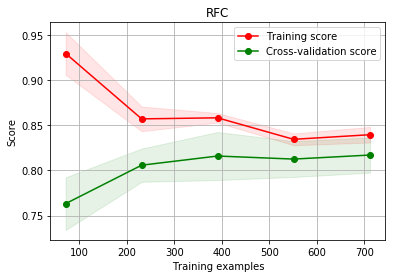

In [160]:
rfc=rfcmodel.best_estimator_
plot_learning_curve(rfc,'RFC',X,Y,cv=cv)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

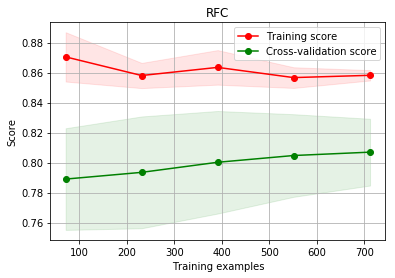

In [161]:
plot_learning_curve(rfctest,'RFC',X,Y,cv=cv)

In [162]:
cross_val_score(rfc,X,Y,cv=cv).mean()

0.8170547988199109

In [163]:
gdt=GradientBoostingClassifier(max_depth=4,min_samples_split=3,
                              learning_rate=1)
gdt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [164]:
gdtbest=GradientBoostingClassifier()
gdttestpara={'n_estimators':range(50,101,10),'learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1]}
gdtmodeltest=GridSearchCV(gdtbest,param_grid=gdttestpara,cv=cv,scoring='accuracy')
gdtmodeltest.fit(X,Y)
gdtmodeltest.best_estimator_
gdttest=gdtmodeltest.best_estimator_
gdttest

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [165]:
gdtpara={'n_estimators':[8,9,10]}
gdtmodel=GridSearchCV(gdt,param_grid=gdtpara,cv=cv,scoring='accuracy')
gdtmodel.fit(X,Y)
gdtmodel.best_estimator_
gdt=gdtmodel.best_estimator_
gdt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

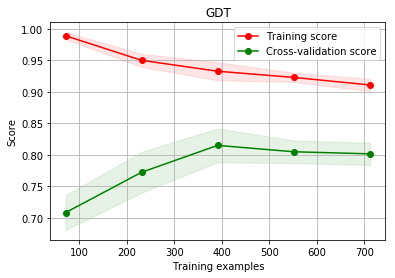

In [166]:
plot_learning_curve(gdt,'GDT',X,Y,cv=cv)

In [167]:
cross_val_score(gdt,X,Y,cv=cv).mean()

0.8204255853367648

In [169]:
xgb=XGBClassifier(n_estimators=30,learning_rate=1)
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [170]:
xgbpara={'max_depth':[3,4,5]}
xgbmodel=GridSearchCV(xgb,param_grid=xgbpara,cv=cv,scoring='accuracy')
xgbmodel.fit(X,Y)
xgb=xgbmodel.best_estimator_
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [171]:
cross_val_score(xgb,X,Y,cv=cv).mean()

0.8036030381018142

<module 'matplotlib.pyplot' from 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python36-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

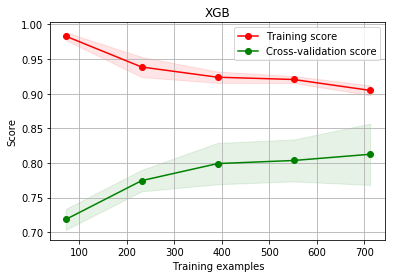

In [172]:
plot_learning_curve(xgb,'XGB',X,Y,cv=cv)

In [173]:
from sklearn.ensemble import VotingClassifier
voteclass=VotingClassifier(estimators=[('m1',knn),('normsvm',normsvm),
                                       ('log',log),('dec',dec),
                                      ('rfc',rfc),('gdt',gdt),('xgb',xgb)],voting='hard')

In [174]:
cross_val_score(voteclass,X,Y,cv=cv).mean()

0.8147824995292197

In [175]:
voteclass.fit(X,Y)

VotingClassifier(estimators=[('m1', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')), ('normsvm', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [177]:
test_data.isnull().sum()

Fare             0
Age_new          0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Sex_0            0
Sex_1            0
SibSp_0          0
SibSp_1          0
SibSp_2          0
SibSp_3          0
SibSp_4          0
SibSp_5          0
SibSp_8          0
Parch_0          0
Parch_1          0
Parch_2          0
Parch_3          0
Parch_4          0
Parch_5          0
Parch_6          0
Parch_9          0
Embarked_0       0
Embarked_1       0
Embarked_2       0
Familysize_1     0
Familysize_2     0
Familysize_3     0
Familysize_4     0
Familysize_5     0
Familysize_6     0
Familysize_7     0
Familysize_8     0
Familysize_11    0
IsAlone_0        0
IsAlone_1        0
Has_Cabin_1      0
dtype: int64

In [179]:
predata=voteclass.predict(test_data)

In [185]:
result=pd.DataFrame({'PassengerId':test_data2['PassengerId'].as_matrix(),
                     'Survived':predata.astype(np.int32)})

In [186]:
result.to_csv(r'D:\桌面\predictions.csv')

In [1]:
new

NameError: name 'new' is not defined